In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
from collections import defaultdict

In [9]:
"""
Read the gzip file, return the decompressed df 
:logfile: filename with gz suffix, i.e.'PeriodicPower.log.gz
Return df
"""
def read_log(logfile):
    with gzip.open(logfile, 'rb') as f:
        df = pd.read_csv(f, delim_whitespace=True)
        return df

0. Note: need to decompress gzip files first.
To plot bar chart, usually use a group of data, which means to decompress a series of gzip files.
In this file, just for display, the data used has been decompressed before.

In [14]:
#df = read_log('PeriodicPower.log.gz')

In [21]:
"""
Process data according to cores, calculate sum, average, std, max, return as dict(dict), i.e. {0: {'sum': 103.49,'average': 0.46}}
:df: dataFrame object of file data
:cores: number of cores(threads)
:mode: [TODO] note: power data is calculated based on the sum, but it does not apply to temperature
:pc: precision of calculated results
Return df, df_results
"""
def process_data(df, cores, mode, pc):
    header_list = df.columns.values
    df_results = {}
    for i in range(cores):
        attr_list = [item for item in header_list if item[:3] == ('C_'+str(i))]     # attribute list of core i
        df['C_'+str(i)] = df[attr_list].sum(axis=1)   #TODO mode to replace
        fractions = {item: round(df[item].sum(),pc) for item in attr_list}
        df_results[i] = {'sum': round(df['C_'+str(i)].sum(), pc),'average': round(df['C_'+str(i)].mean(), pc),\
                         'std': round(df['C_'+str(i)].std(), pc), 'max':round(df['C_'+str(i)].max(), pc), \
                         'fraction':fractions}
        
    
    return df,df_results

1. Sample data/ decompress the gzip files

In [22]:
logdict = {"1":"./PeriodicPower_x264_1.log", "1.5":"./PeriodicPower_x264_1.5.log", \
           "2":"./PeriodicPower_x264_2.log", "2.5":"./PeriodicPower_x264_2.5.log", \
           "3":"./PeriodicPower_x264_3.log","3.5":"./PeriodicPower_x264_3.5.log", \
           "4":"./PeriodicPower_x264_4.log"}

2. Read File and process data

In [23]:
df_dict = {}
df_sum = {}
for k, log in logdict.items():
    df = pd.read_csv(log, delim_whitespace=True)  # read file
    _, df_results = process_data(df, 4, sum, 2)   # process data
    df_dict[k] = df_results

3. Plot

In [24]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# https://stackoverflow.com/questions/14279344/how-can-i-add-textures-to-my-bars-and-wedges
# https://stackoverflow.com/questions/51677343/cannot-change-hatch-density-using-contourf-in-matplotlib-2-2-2
# metrics: 'average', 'sum', 'std', 'max'
"""
Plot bar chart by providing the df_results dict, x_a and y_a corresponds to the x and y axis respectively.
:df_dict: dict of metrics
:metrics: metrics name, STRING
:x_label: x axis name
:y_label: y axis name
:title: title of bar chart
:adjust_ylim: ylim to adjust the upper bound of y axis
:bar_width: bar width to adjust the width of each bar
"""
def plot_bar(df_dict, metrics, x_label, y_label, title, adjust_ylim=0, bar_width=0.2):
    x_a = df_dict.keys()
    y_a = {}
    for i in range(4):
        y_a[i] = []
        for v in df_dict.values():
            y_a[i].append(v[i][metrics])
    species = x_a
    penguin_means = y_a
    
    x = np.arange(len(species))  # the label locations
    width = bar_width  # the width of the bars
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained')
    # double the pattern to increase density
    patterns = [ "//" , "\\\\"  , "xx", "oo", "OO", "..", "**" ]
    
    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='black', hatch=patterns[multiplier])
        ax.bar_label(rects, padding=4)
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.set_xticks(x + width, species)
    ax.legend(loc='upper left', ncols=4)
    if adjust_ylim > 0:
        ax.set_ylim(0, adjust_ylim)
    
    plt.show()


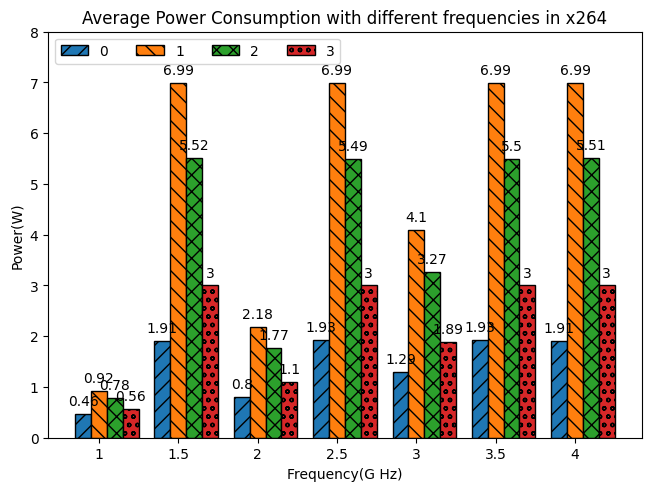

In [25]:
x_label = 'Frequency(G Hz)'
y_label = 'Power(W)'
title = 'Average Power Consumption with different frequencies in x264'
plot_bar(df_dict, 'average', x_label, y_label, title, 8)

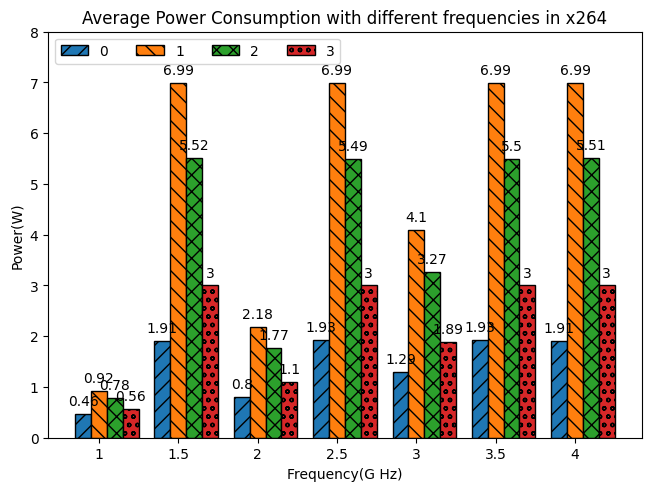

In [26]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# https://stackoverflow.com/questions/14279344/how-can-i-add-textures-to-my-bars-and-wedges
# https://stackoverflow.com/questions/51677343/cannot-change-hatch-density-using-contourf-in-matplotlib-2-2-2
# metrics: 'average', 'sum', 'std', 'max'
def plot_bar(df_dict, metrics, x_label, y_label, title, adjust_ylim=0, bar_width=0.2):
    x_a = df_dict.keys()
    y_a = {}
    for i in range(4):
        y_a[i] = []
        for v in df_dict.values():
            y_a[i].append(v[i][metrics])
    species = x_a
    penguin_means = y_a
    
    x = np.arange(len(species))  # the label locations
    width = bar_width  # the width of the bars
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained')
    # double the pattern to increase density
    patterns = [ "//" , "\\\\"  , "xx", "oo", "OO", "..", "**" ]
    
    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='black', hatch=patterns[multiplier])
        ax.bar_label(rects, padding=4)
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.set_xticks(x + width, species)
    ax.legend(loc='upper left', ncols=4)
    if adjust_ylim > 0:
        ax.set_ylim(0, adjust_ylim)
    
    plt.show()

x_label = 'Frequency(G Hz)'
y_label = 'Power(W)'
title = 'Average Power Consumption with different frequencies in x264'
plot_bar(df_dict, 'average', x_label, y_label, title, 8)